In [1]:
pip install gym

Note: you may need to restart the kernel to use updated packages.


**Part I: Define an RL Environment [30 points]**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import gym 
from gym import spaces
import matplotlib.patches as mpatches
from IPython.display import display

In [3]:
#space = gym.spaces.Box(low=-1.0, high=1.0, shape=(3,))

In [4]:
class GridEnvironment(gym.Env):
    def __init__(self):    
        self.observation_space = spaces.Discrete(16)
        self.action_space = spaces.Discrete(4)
        self.max_timesteps = 100
        self.reward= 0
    
        #  Defining rewards, start position and goal of robot
        self.positive_rewards1 = [0, 2]
        self.positive_rewards2 = [1, 1]
        self.positive_rewards3 = [3, 1]
        self.negative_rewards1 = [1, 2]
        self.negative_rewards2 = [2, 0]
        self.negative_rewards3 = [3, 2]
        self.robot_position = [3,0]
        self.goal_position = [0,3]

        # Creating a grid of 4X4
        self.state = np.zeros((4, 4))
        self.state[tuple(self.robot_position)] = 1
        self.state[tuple(self.goal_position)] = 10
        self.state[tuple(self.positive_rewards1)] = 5
        self.state[tuple(self.positive_rewards2)] = 5
        self.state[tuple(self.positive_rewards3)] = 5
        self.state[tuple(self.negative_rewards1)] = -3
        self.state[tuple(self.negative_rewards2)] = -3
        self.state[tuple(self.negative_rewards3)] = -3

    
    def reset(self):
        self.timestep = 0
        self.robot_position = [3, 0]
        position= self.robot_position[0]*4+self.robot_position[1]
        self.goal_position = [0, 3]
        self.state = np.zeros((4, 4))
        self.state[tuple(self.robot_position)] = 1
        self.state[tuple(self.goal_position)] = 10
        self.state[tuple(self.positive_rewards1)] = 5
        self.state[tuple(self.positive_rewards2)] = 5
        self.state[tuple(self.positive_rewards3)] = 5
        self.state[tuple(self.negative_rewards1)] = -3
        self.state[tuple(self.negative_rewards2)] = -3
        self.state[tuple(self.negative_rewards3)] = -3
        self.reward = 0
        return position

    def step(self, action):
        self.state[tuple(self.robot_position)] = 0
        negative_reward_positions = [self.negative_rewards1, self.negative_rewards2, self.negative_rewards3]
        positive_reward_positions = [self.positive_rewards1, self.positive_rewards2, self.positive_rewards3]
        # If action is up
        if action == 0:
            # The robot row index is decreased by 1
            self.robot_position[0] = self.robot_position[0] - 1
            # The robot row index is less than the lower bounds, robot must stay in the same position
            if self.robot_position[0] == -1:
                self.robot_position[0] = self.robot_position[0] + 1
        # If action is down
        if action == 1:
            # The robot row index is increased by 1
            self.robot_position[0] = self.robot_position[0] + 1
            # The robot row index is greater than the upper bounds, robot must stay in the same position
            if self.robot_position[0] == 4:
                self.robot_position[0] = self.robot_position[0] - 1
        # If action is left        
        if action == 2:
            # The robot column index is decreased by 1
            self.robot_position[1] = self.robot_position[1] - 1
            # The robot column index is less than the lower bounds, robot must stay in the same position
            if self.robot_position[1] == -1:
                self.robot_position[1] = self.robot_position[1]+1
        # If action is right        
        if action == 3:
            # The robot column index is increased by 1
            self.robot_position[1] = self.robot_position[0] + 1
            # The robot column index is greater than the upper bounds, robot must stay in the same position
            if self.robot_position[1] == 4:
                self.robot_position[1] = self.robot_position[1] -1
        # limit the row and column indices of the robot's position to be between 0 and 3 (inclusive) 
        self.robot_position = np.clip(self.robot_position, 0, 3)
        state_table=np.array([[0,1,2,3],[4,5,6,7],[8,9,10,11],[12,13,14,15]])
        curr = state_table[tuple(self.robot_position)]

        for value in negative_reward_positions:
            if np.array_equal(self.robot_position, value):
                self.reward = self.reward - 3
                break
        for value in positive_reward_positions:
            if np.array_equal(self.robot_position, value):
                self.reward = self.reward + 5
                break
                
        goalFlag = False
        if np.array_equal(self.robot_position, self.goal_position):
            self.reward = self.reward + 10
            goalFlag = True
            
        self.state[tuple(self.robot_position)] = 1
        self.state[tuple(self.positive_rewards1)] = 5
        self.state[tuple(self.positive_rewards2)] = 5
        self.state[tuple(self.positive_rewards3)] = 5
        self.state[tuple(self.negative_rewards1)] = -3
        self.state[tuple(self.negative_rewards2)] = -3
        self.state[tuple(self.negative_rewards3)] = -3

        self.timestep = self.timestep + 1
        if (self.timestep >= self.max_timesteps or goalFlag):
            done = True
        else:
            done = False
        return curr, self.reward, done

    def render(self):
        import time
        time.sleep(0.01)
        return plt.imshow(self.state)
#         time.sleep(0.01)

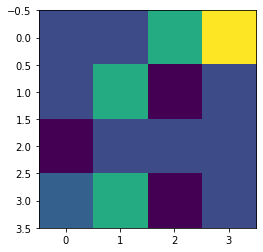

In [5]:
environment = GridEnvironment()
observation = environment.reset()
environment.render()

In [6]:
action_list =[0,1,2,3]
action_dictionary  ={0:"up", 1:"down", 2:"left", 3:"right"}

In [7]:
# initial_timestep=1
# timestep = initial_timestep
# random = np.random.choice(action_list)
# observation, reward, done, _ = environment.step(random)
# print("Current state : ",observation)
# print("Chosen action : ",action_dictionary[random])
# print('Reward : ', reward)
# environment.render()
# timestep=timestep+1

Time Step :  1
Current state :  8
Chosen action :  up
Reward :  -3


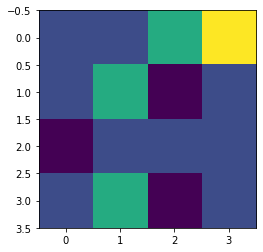

Time Step :  2
Current state :  12
Chosen action :  down
Reward :  -3


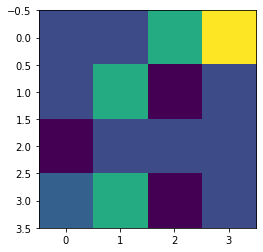

Time Step :  3
Current state :  12
Chosen action :  down
Reward :  -3


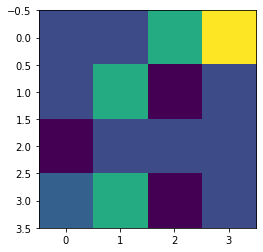

Time Step :  4
Current state :  12
Chosen action :  down
Reward :  -3


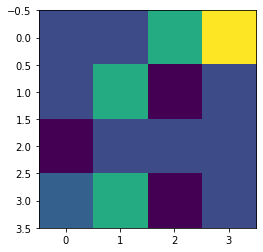

Time Step :  5
Current state :  15
Chosen action :  right
Reward :  -3


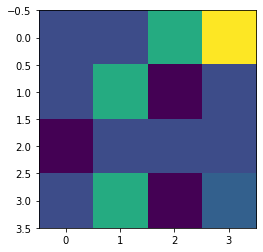

Time Step :  6
Current state :  14
Chosen action :  left
Reward :  -6


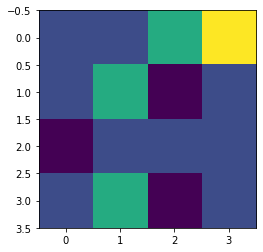

Time Step :  7
Current state :  10
Chosen action :  up
Reward :  -6


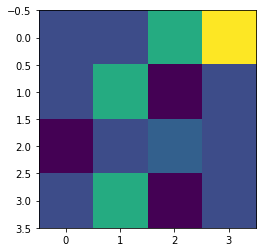

Time Step :  8
Current state :  9
Chosen action :  left
Reward :  -6


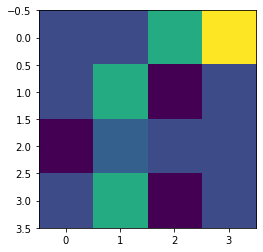

Time Step :  9
Current state :  5
Chosen action :  up
Reward :  -1


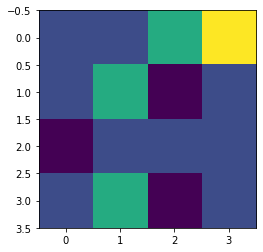

Time Step :  10
Current state :  1
Chosen action :  up
Reward :  -1


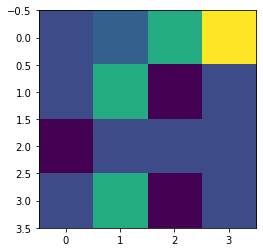

Time Step :  11
Current state :  0
Chosen action :  left
Reward :  -1


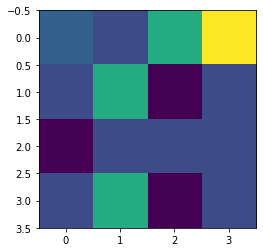

Time Step :  12
Current state :  4
Chosen action :  down
Reward :  -1


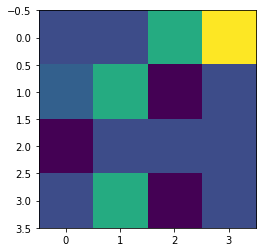

Time Step :  13
Current state :  4
Chosen action :  left
Reward :  -1


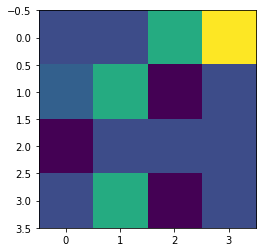

Time Step :  14
Current state :  4
Chosen action :  left
Reward :  -1


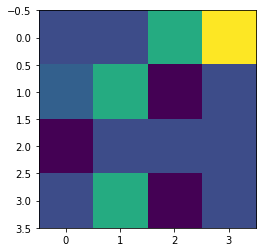

Time Step :  15
Current state :  0
Chosen action :  up
Reward :  -1


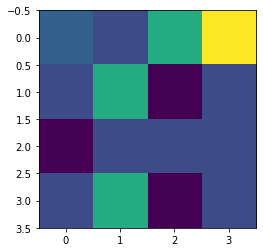

Time Step :  16
Current state :  1
Chosen action :  right
Reward :  -1


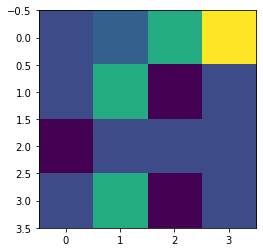

Time Step :  17
Current state :  0
Chosen action :  left
Reward :  -1


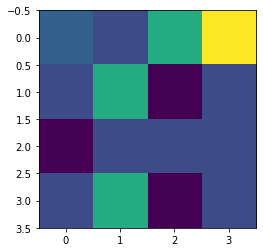

Time Step :  18
Current state :  0
Chosen action :  left
Reward :  -1


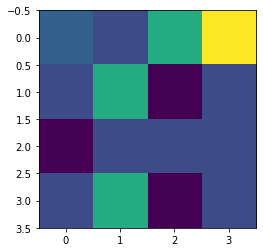

Time Step :  19
Current state :  0
Chosen action :  left
Reward :  -1


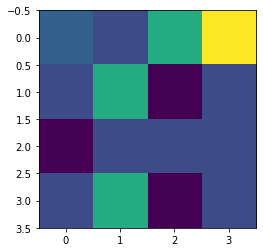

In [8]:
environment.reset()
for timestep in range(1,20):
    random = np.random.choice(action_list)
    observation, reward, done = environment.step(random)
    print("Time Step : ",timestep)
    print("Current state : ",observation)
    print("Chosen action : ",action_dictionary[random])
    print('Reward : ', reward)
    plt.show(environment.render())

**Part II: Solve your environment using – SARSA [40 points]**

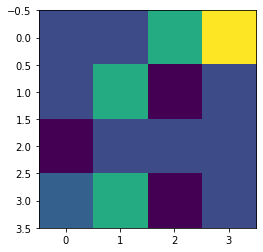

In [9]:
import numpy as np
import gym
environment = GridEnvironment()
observation = environment.reset()
environment.render()

In [10]:
def sarsa(epsilon, epsilon_decay_rate, number_of_episodes, max_steps, lr_rate, discount, Q_matrix):
    epsilon, epsilon_decay_rate, number_of_episodes, max_steps, lr_rate, discount, Q_matrix = epsilon, epsilon_decay_rate, number_of_episodes, max_steps, lr_rate, discount, Q_matrix
    # Starting the SARSA learning
    all_rewards, all_epsilons = [], []
    reward, max_reward, average = 0,0,0
    for episode in range(number_of_episodes):
        step = 0
        state1 = environment.reset()
        # Action
        action1=0
        if np.random.uniform(0, 1) < epsilon:
            action1 = environment.action_space.sample()
        else:
            action1 = np.argmax(Q_matrix[state1, :])
        while step < max_steps:
            environment.render()
            state2, reward, done = environment.step(action1)

            # Next Action
            action2=0
            if np.random.uniform(0, 1) < epsilon:
                action2 = environment.action_space.sample()
            else:
                action2 = np.argmax(Q_matrix[state2, :])

            # Learning Q-value
            predict = Q_matrix[state1, action1]
            target = reward + discount * Q_matrix[state2, action2]
            Q_matrix[state1, action1] = Q_matrix[state1, action1] + lr_rate * (target - predict)
            state1 = state2
            action1 = action2

            if epsilon > 0.1:
                epsilon = epsilon - epsilon_decay_rate

            #Updating the respective values
            step = step + 1
            reward = reward + 1

            #If at the end of learning process
            if done:
                all_epsilons.append(epsilon)
                all_rewards.append(reward) # Add the episode reward to the list
                break
                
        if reward>max_reward:
            max_reward = reward
        print(f'Episode Number : {episode}, Reward : {reward}, Epsilon : {epsilon}')
    print (f'Max Reward : {max_reward}')
    print (f'Performance : {reward/number_of_episodes}')
    print(Q_matrix)
    return all_epsilons, all_rewards
    
def epsilon_plot(epsilon1):
    all_epsilons=epsilon1
    plt.plot(all_epsilons, label='Epsilon Graph')
    plt.xlabel('Episode')
    plt.ylabel('Epsilon')
    plt.legend()
    plt.show()
    
def reward_plot(reward1):
    all_rewards=reward1
    plt.plot(all_rewards, label='Rewards Graph')
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.legend()
    plt.show()

In [11]:
#Defining the different parameters
epsilon = 0.9
# min_epsilon = 0.1
# max_epsilon = 1.0
epsilon_decay_rate = 0.001
number_of_episodes = 100
max_steps = 100
lr_rate = 0.85             # learning rate or alpha
discount = 0.95            # Discount factor or gamma
# print(environment.observation_space)
# print(environment.observation_space.n)
Q_matrix = np.zeros((environment.observation_space.n, environment.action_space.n)) #Initialize the Q-matrix
epsilon_sarsa1, reward_sarsa1 = sarsa(epsilon, epsilon_decay_rate, number_of_episodes, max_steps, lr_rate, discount, Q_matrix)

Episode Number : 0, Reward : 5, Epsilon : 0.892
Episode Number : 1, Reward : 11, Epsilon : 0.7919999999999999
Episode Number : 2, Reward : 5, Epsilon : 0.6919999999999998
Episode Number : 3, Reward : 10, Epsilon : 0.6779999999999998
Episode Number : 4, Reward : -4, Epsilon : 0.6599999999999998
Episode Number : 5, Reward : -5, Epsilon : 0.5599999999999997
Episode Number : 6, Reward : 8, Epsilon : 0.45999999999999963
Episode Number : 7, Reward : 17, Epsilon : 0.35999999999999954
Episode Number : 8, Reward : 74, Epsilon : 0.25999999999999945
Episode Number : 9, Reward : 144, Epsilon : 0.15999999999999936
Episode Number : 10, Reward : 28, Epsilon : 0.09999999999999931
Episode Number : 11, Reward : 135, Epsilon : 0.09999999999999931
Episode Number : 12, Reward : 22, Epsilon : 0.09999999999999931
Episode Number : 13, Reward : 52, Epsilon : 0.09999999999999931
Episode Number : 14, Reward : 46, Epsilon : 0.09999999999999931
Episode Number : 15, Reward : 36, Epsilon : 0.09999999999999931
Episod

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Kedar\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3418, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-11-4243dee79000>", line 13, in <module>
    epsilon1, reward_sarsa1 = sarsa(epsilon, epsilon_decay_rate, number_of_episodes, max_steps, lr_rate, discount, Q_matrix)
  File "<ipython-input-10-9ba495a4f652>", line 16, in sarsa
    environment.render()
  File "<ipython-input-4-328f5bb3ad37>", line 115, in render
    time.sleep(0.01)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Kedar\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2045, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent

TypeError: object of type 'NoneType' has no len()

Error in callback <function flush_figures at 0x0000019A847F8670> (for post_execute):


KeyboardInterrupt: 

In [ ]:
epsilon_plot(epsilon_sarsa1)
reward_plot(reward_sarsa1)

**Hyper parameter tuning**

In [ ]:
#Defining the different parameters
epsilon = 0.7
# min_epsilon = 0.1
# max_epsilon = 1.0
epsilon_decay_rate = 0.01
number_of_episodes = 200
max_steps = 100
lr_rate = 0.85             # learning rate or alpha
discount = 0.95            # Discount factor or gamma
# print(environment.observation_space)
# print(environment.observation_space.n)
Q_matrix = np.zeros((environment.observation_space.n, environment.action_space.n)) #Initialize the Q-matrix
epsilon_sarsa2, reward_sarsa2 = sarsa(epsilon, epsilon_decay_rate, number_of_episodes, max_steps, lr_rate, discount, Q_matrix)

In [ ]:
epsilon_plot(epsilon_sarsa2)
reward_plot(reward_sarsa2)

In [ ]:
#Defining the different parameters
epsilon = 0.5
# min_epsilon = 0.1
# max_epsilon = 1.0
epsilon_decay_rate = 0.001
number_of_episodes = 225
max_steps = 100
lr_rate = 0.75             # learning rate or alpha
discount = 0.85            # Discount factor or gamma
# print(environment.observation_space)
# print(environment.observation_space.n)
Q_matrix = np.zeros((environment.observation_space.n, environment.action_space.n)) #Initialize the Q-matrix
epsilon_sarsa3, reward_sarsa3 = sarsa(epsilon, epsilon_decay_rate, number_of_episodes, max_steps, lr_rate, discount, Q_matrix)

In [ ]:
epsilon_plot(epsilon_sarsa3)
reward_plot(reward_sarsa3)

In [ ]:
#Defining the different parameters
epsilon = 0.8
# min_epsilon = 0.1
# max_epsilon = 1.0
epsilon_decay_rate = 0.1
number_of_episodes = 250
max_steps = 100
lr_rate = 0.85             # learning rate or alpha
discount = 0.95            # Discount factor or gamma
# print(environment.observation_space)
# print(environment.observation_space.n)
Q_matrix = np.zeros((environment.observation_space.n, environment.action_space.n)) #Initialize the Q-matrix
epsilon_sarsa4, reward_sarsa4 = sarsa(epsilon, epsilon_decay_rate, number_of_episodes, max_steps, lr_rate, discount, Q_matrix)

In [ ]:
epsilon_plot(epsilon_sarsa4)
reward_plot(reward_sarsa4)

In [ ]:
#Defining the different parameters
epsilon = 0.2
# min_epsilon = 0.1
# max_epsilon = 1.0
epsilon_decay_rate = 0.009
number_of_episodes = 275
max_steps = 100
lr_rate = 0.8             # learning rate or alpha
discount = 0.7            # Discount factor or gamma
# print(environment.observation_space)
# print(environment.observation_space.n)
Q_matrix = np.zeros((environment.observation_space.n, environment.action_space.n)) #Initialize the Q-matrix
epsilon_sarsa5, reward_sarsa5 = sarsa(epsilon, epsilon_decay_rate, number_of_episodes, max_steps, lr_rate, discount, Q_matrix)

In [ ]:
epsilon_plot(epsilon_sarsa5)
reward_plot(reward_sarsa5)

In [ ]:
#Defining the different parameters
epsilon = 0.3
# min_epsilon = 0.1
# max_epsilon = 1.0
epsilon_decay_rate = 0.05
number_of_episodes = 300
max_steps = 100
lr_rate = 0.5             # learning rate or alpha
discount = 0.5            # Discount factor or gamma
# print(environment.observation_space)
# print(environment.observation_space.n)
Q_matrix = np.zeros((environment.observation_space.n, environment.action_space.n)) #Initialize the Q-matrix
epsilon_sarsa6, reward_sarsa6 = sarsa(epsilon, epsilon_decay_rate, number_of_episodes, max_steps, lr_rate, discount, Q_matrix)

In [ ]:
epsilon_plot(epsilon_sarsa6)
reward_plot(reward_sarsa6)